## ***Load traffic dataset***

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/original.csv') #Load Dataset
df.shape #Print the total number of data and how many columns it has

(104345, 23)

In [2]:
df.sample(6) #Random loading of 6 data

dt  switch        src       dst  pktcount  bytecount  dur  \
76709  41674       3   10.0.0.5  10.0.0.9       260      17160    1   
28417   3219       5  10.0.0.12  10.0.0.5     74973   79921218  163   
8587   10356       3  10.0.0.10  10.0.0.7    129996  135455832  473   
8511   10056       3   10.0.0.1  10.0.0.7    100146  106755636  221   
29147   3909       5   10.0.0.8  10.0.0.5     39212   41799992   87   
10487  11395       4  10.0.0.11  10.0.0.8    134697  143587002  319   

        dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
76709  120000000  1.120000e+09      5  ...        0         1       TCP   
28417  344000000  1.630000e+11      4  ...      447         0       UDP   
8587   399000000  4.730000e+11      2  ...      126         0       UDP   
8511   698000000  2.220000e+11      4  ...      443         0       UDP   
29147  210000000  8.721000e+10      2  ...      449         0       UDP   
10487  298000000  3.190000e+11      8  ...      137         0       UDP   

       port_no  tx_bytes   rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
76709        4  22318254  193707222      138   4058.0    4196.0      1  
28417        1      4336       1312        0      0.0       0.0      0  
8587         2      3621       1312        0      0.0       0.0      1  
8511         2      3413       3539        0      0.0       0.0      0  
29147        4      6287  808119971        0   7676.0    7676.0      0  
10487        3      3875  122775421        0   9473.0    9473.0      1  

[6 rows x 23 columns]

In [3]:
df.info() #View data information (including field names, how many columns are non-null, and the type of each column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [4]:
df.isna().sum()#See the sum of the number of times each column of data is empty

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

## ***Basic Data Cleaning***

In [5]:
df.dropna(inplace=True) #Deleting data containing columns with null data
df.isna().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [6]:
df.shape #Print the amount of data after deletion and the dimensions

(103839, 23)

In [7]:
# drop columns which contain null
df.drop(['dt', 'switch', 'src', 'dst','port_no'], axis=1, inplace=True) #Delete unneeded columns
df.head() #View the first five rows of data

pktcount  bytecount  dur   dur_nsec       tot_dur  flows  packetins  \
0     45304   48294064  100  716000000  1.010000e+11      3       1943   
1    126395  134737070  280  734000000  2.810000e+11      2       1943   
2     90333   96294978  200  744000000  2.010000e+11      3       1943   
3     90333   96294978  200  744000000  2.010000e+11      3       1943   
4     90333   96294978  200  744000000  2.010000e+11      3       1943   

   pktperflow  byteperflow  pktrate  Pairflow Protocol   tx_bytes  rx_bytes  \
0       13535     14428310      451         0      UDP  143928631      3917   
1       13531     14424046      451         0      UDP       3842      3520   
2       13534     14427244      451         0      UDP       3795      1242   
3       13534     14427244      451         0      UDP       3688      1492   
4       13534     14427244      451         0      UDP       3413      3665   

   tx_kbps  rx_kbps  tot_kbps  label  
0        0      0.0       0.0      0  
1        0      0.0       0.0      0  
2        0      0.0       0.0      0  
3        0      0.0       0.0      0  
4        0      0.0       0.0      0

In [8]:
df.shape

(103839, 18)

In [9]:
#we need to copy one for the purpose of data analysis
danalysis = df.iloc[:,:] #Data copies

## ***Data Analysis***

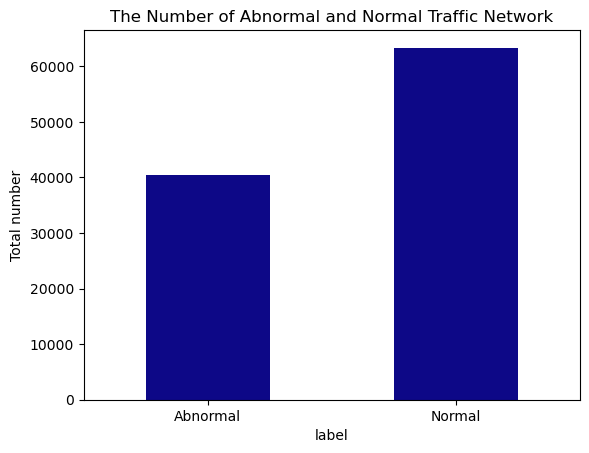

In [10]:
import matplotlib.pyplot as plt


# Proportion of data for normal and abnormal traffic
danalysis['label'] = danalysis['label'].replace({0: 'Normal', 1: 'Abnormal'}) #replace label（from number to actual label）
danalysis.groupby('label').count()['dur'].plot(kind='bar',rot=0,
                                               title='The Number of Abnormal and Normal Traffic Network',
                                               ylabel='Total number',
                                              colormap='plasma'
                                              )
plt.savefig('picuture1')

In [11]:
#Classification of normal and abnormal values for each protocol according to protocol and label
sep_tot = danalysis.groupby(['Protocol','label']).count()['pktcount'].reset_index()
sep_tot.rename(columns={'pktcount': 'tot'}, inplace=True)
data = sep_tot

In [12]:
data

Protocol     label    tot
0     ICMP  Abnormal   9419
1     ICMP    Normal  31902
2      TCP  Abnormal  13866
3      TCP    Normal  15570
4      UDP  Abnormal  17219
5      UDP    Normal  15863

In [13]:
ab = [data['tot'][i] for i in range(len(data['tot'])) if data['label'][i] == 'Abnormal'] #get total anbormal traffic
n = [data['tot'][i] for i in range(len(data['tot'])) if data['label'][i] == 'Normal'] #get total normal traffic
data['Protocol'].unique().tolist()

['ICMP', 'TCP', 'UDP']

## ***Bar Chart About Three Protocol***

In [14]:
#Stacked plot of the number of normal and abnormal under each protocol
import pyecharts
from pyecharts import options as opts
bar = (
    pyecharts.charts.Bar()  
    .add_xaxis(data['Protocol'].unique().tolist())
    .add_yaxis("Abnormal", [9419, 13866, 17219], stack="stack1")
    .add_yaxis("Normal", [31902, 15570, 15863], stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="The Number in Different Protocol"),        
                     toolbox_opts=opts.ToolboxOpts(
                    is_show=True,
                    feature={
                        "saveAsImage": opts.ToolBoxFeatureSaveAsImageOpts(
                            type_="png",
                            title="picture2",
                            is_show=True)}
))
)
# save as html
bar.render("bar_chart.html")

'C:\\Users\\Administrator\\Desktop\\dissertation\\bar_chart.html'

In [15]:
danalysis

pktcount  bytecount  dur   dur_nsec       tot_dur  flows  packetins  \
0          45304   48294064  100  716000000  1.010000e+11      3       1943   
1         126395  134737070  280  734000000  2.810000e+11      2       1943   
2          90333   96294978  200  744000000  2.010000e+11      3       1943   
3          90333   96294978  200  744000000  2.010000e+11      3       1943   
4          90333   96294978  200  744000000  2.010000e+11      3       1943   
...          ...        ...  ...        ...           ...    ...        ...   
104340        79       7742   81  842000000  8.184200e+10      5         10   
104341        79       7742   81  842000000  8.184200e+10      5         10   
104342        31       3038   31  805000000  3.180500e+10      5         10   
104343        31       3038   31  805000000  3.180500e+10      5         10   
104344        31       3038   31  805000000  3.180500e+10      5         10   

        pktperflow  byteperflow  pktrate  Pairflow Protocol   tx_bytes  \
0            13535     14428310      451         0      UDP  143928631   
1            13531     14424046      451         0      UDP       3842   
2            13534     14427244      451         0      UDP       3795   
3            13534     14427244      451         0      UDP       3688   
4            13534     14427244      451         0      UDP       3413   
...            ...          ...      ...       ...      ...        ...   
104340          29         2842        0         0     ICMP      15209   
104341          29         2842        0         0     ICMP      15099   
104342          30         2940        1         0     ICMP       3409   
104343          30         2940        1         0     ICMP      15209   
104344          30         2940        1         0     ICMP      15099   

        rx_bytes  tx_kbps  rx_kbps  tot_kbps   label  
0           3917        0      0.0       0.0  Normal  
1           3520        0      0.0       0.0  Normal  
2           1242        0      0.0       0.0  Normal  
3           1492        0      0.0       0.0  Normal  
4           3665        0      0.0       0.0  Normal  
...          ...      ...      ...       ...     ...  
104340     12720        1      1.0       2.0  Normal  
104341     14693        1      1.0       2.0  Normal  
104342      3731        0      0.0       0.0  Normal  
104343     12720        1      1.0       2.0  Normal  
104344     14693        1      1.0       2.0  Normal  

[103839 rows x 18 columns]

## Get Udp Normal/Udp Abnormal....

In [18]:
#Get the number of different normal and abnormal traffic under the three protocols

udpn = danalysis[(danalysis['Protocol'] == 'UDP') & (danalysis['label'] == 'Normal')]
udpa = danalysis[(danalysis['Protocol'] == 'UDP') & (danalysis['label'] == 'Abnormal')]

icmpn = danalysis[(danalysis['Protocol'] == 'ICMP') & (danalysis['label'] == 'Normal')]
icmpa = danalysis[(danalysis['Protocol'] == 'ICMP') & (danalysis['label'] == 'Abnormal')]

tcpn = danalysis[(danalysis['Protocol'] == 'TCP') & (danalysis['label'] == 'Normal')]
tcpa = danalysis[(danalysis['Protocol'] == 'TCP') & (danalysis['label'] == 'Abnormal')]

pktcount  bytecount  dur   dur_nsec       tot_dur  flows  packetins  \
33588      1072      57888    3  986000000  3.986000e+09      6       4357   
33589      1072      57888    3  986000000  3.986000e+09      6       4357   
33590      1072      57888    3  986000000  3.986000e+09      6       4357   
33591     31937    1724598   54  108000000  5.410800e+10      3       4357   
33592     31937    1724598   54  108000000  5.410800e+10      3       4357   
...         ...        ...  ...        ...           ...    ...        ...   
86250    128217  146769450  319   68000000  3.190000e+11      3       2400   
86251    128217  146769450  319   68000000  3.190000e+11      3       2400   
86252     83215    5493138  319   52000000  3.190000e+11      3       2400   
86253     83215    5493138  319   52000000  3.190000e+11      3       2400   
86254     83215    5493138  319   52000000  3.190000e+11      3       2400   

       pktperflow  byteperflow  pktrate  Pairflow Protocol   tx_bytes  \
33588           0            0        0         1      TCP       3752   
33589           0            0        0         1      TCP   77589046   
33590           0            0        0         1      TCP    4219561   
33591       18116       978264      603         1      TCP       3744   
33592       18116       978264      603         1      TCP     901184   
...           ...          ...      ...       ...      ...        ...   
86250        4666      5535476      155         1      TCP  328205697   
86251        4666      5535476      155         1      TCP  320171777   
86252        2656       175296       88         1      TCP    7546959   
86253        2656       175296       88         1      TCP  328205697   
86254        2656       175296       88         1      TCP  320171777   

        rx_bytes  tx_kbps  rx_kbps  tot_kbps     label  count_rate  
33588      65312        0     17.0      17.0  Abnormal         0.0  
33589    4219668     4204    312.0    4516.0  Abnormal         0.0  
33590   77524906      312   4187.0    4499.0  Abnormal         0.0  
33591     900356        0    131.0     131.0  Abnormal         0.0  
33592     836870      140    131.0     271.0  Abnormal         0.0  
...          ...      ...      ...       ...       ...         ...  
86250  327713201     1417     44.0    1461.0  Abnormal         0.0  
86251  314164209       44   1417.0    1461.0  Abnormal         0.0  
86252   14042870        0      0.0       0.0  Abnormal         0.0  
86253  327713201     1417     44.0    1461.0  Abnormal         0.0  
86254  314164209       44   1417.0    1461.0  Abnormal         0.0  

[13866 rows x 19 columns]

# Comparison of the frequency of normal and abnormal data for different traffic indicators

## ***Information About Normal***

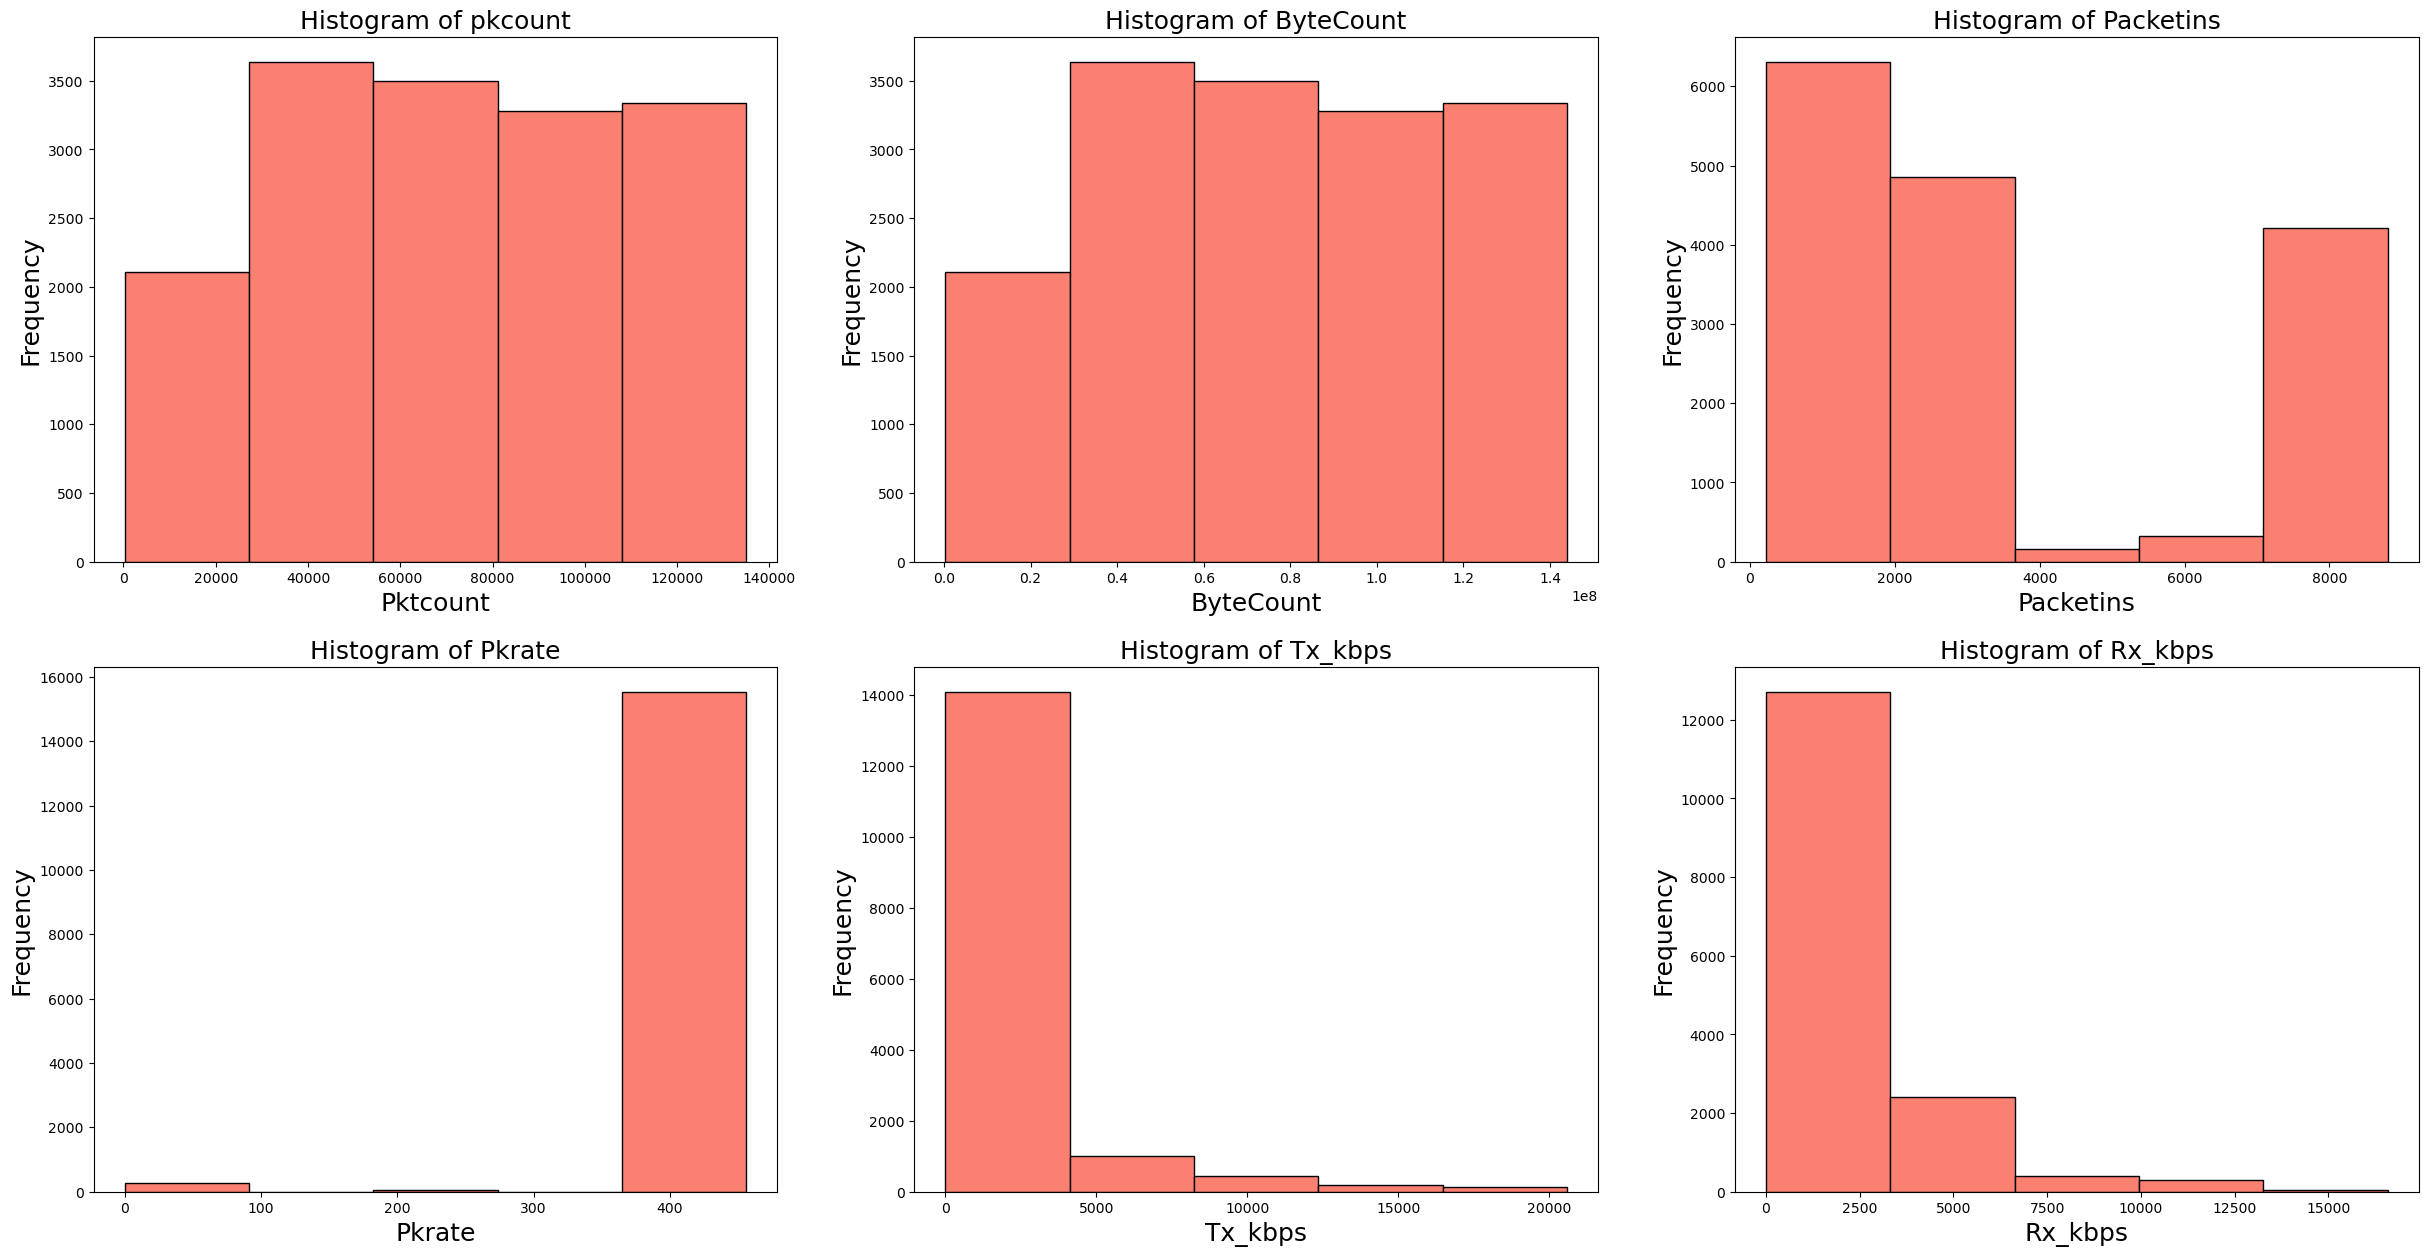

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


data_normal = {
    'pktcount': udpn['pktcount'],
    'bytecount': udpn['bytecount'],
    'packetins': udpn['packetins'],
    'pkrate':udpn['pktrate'],
    'tx_kbps':udpn['tx_kbps'],
    'rx_kbps':udpn['rx_kbps'],
}

fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.hist(data_normal['pktcount'], bins=5, color='salmon', edgecolor='black')
ax1.set_xlabel('Pktcount',fontsize=18)  
ax1.set_ylabel('Frequency',fontsize=18) 
ax1.set_title('Histogram of pkcount',fontsize=18)

ax2.hist(data_normal['bytecount'], bins=5, color='salmon', edgecolor='black')
ax2.set_xlabel('ByteCount',fontsize=18)
ax2.set_ylabel('Frequency',fontsize=18)
ax2.set_title('Histogram of ByteCount',fontsize=18)

ax3.hist(data_normal['packetins'], bins=5, color='salmon', edgecolor='black')
ax3.set_xlabel('Packetins',fontsize=18)
ax3.set_ylabel('Frequency',fontsize=18)
ax3.set_title('Histogram of Packetins',fontsize=18)

ax4.hist(data_normal['pkrate'], bins=5, color='salmon', edgecolor='black')
ax4.set_xlabel('Pkrate',fontsize=18)
ax4.set_ylabel('Frequency',fontsize=18)
ax4.set_title('Histogram of Pkrate',fontsize=18)

ax5.hist(data_normal['tx_kbps'], bins=5, color='salmon', edgecolor='black')
ax5.set_xlabel('Tx_kbps',fontsize=18)
ax5.set_ylabel('Frequency',fontsize=18)
ax5.set_title('Histogram of Tx_kbps',fontsize=18)

ax6.hist(data_normal['rx_kbps'], bins=5, color='salmon', edgecolor='black')
ax6.set_xlabel('Rx_kbps',fontsize=18)
ax6.set_ylabel('Frequency',fontsize=18)
ax6.set_title('Histogram of Rx_kbps',fontsize=18)

plt.savefig('./picture/normal_info_udp.png')

## ***Information About Normal***

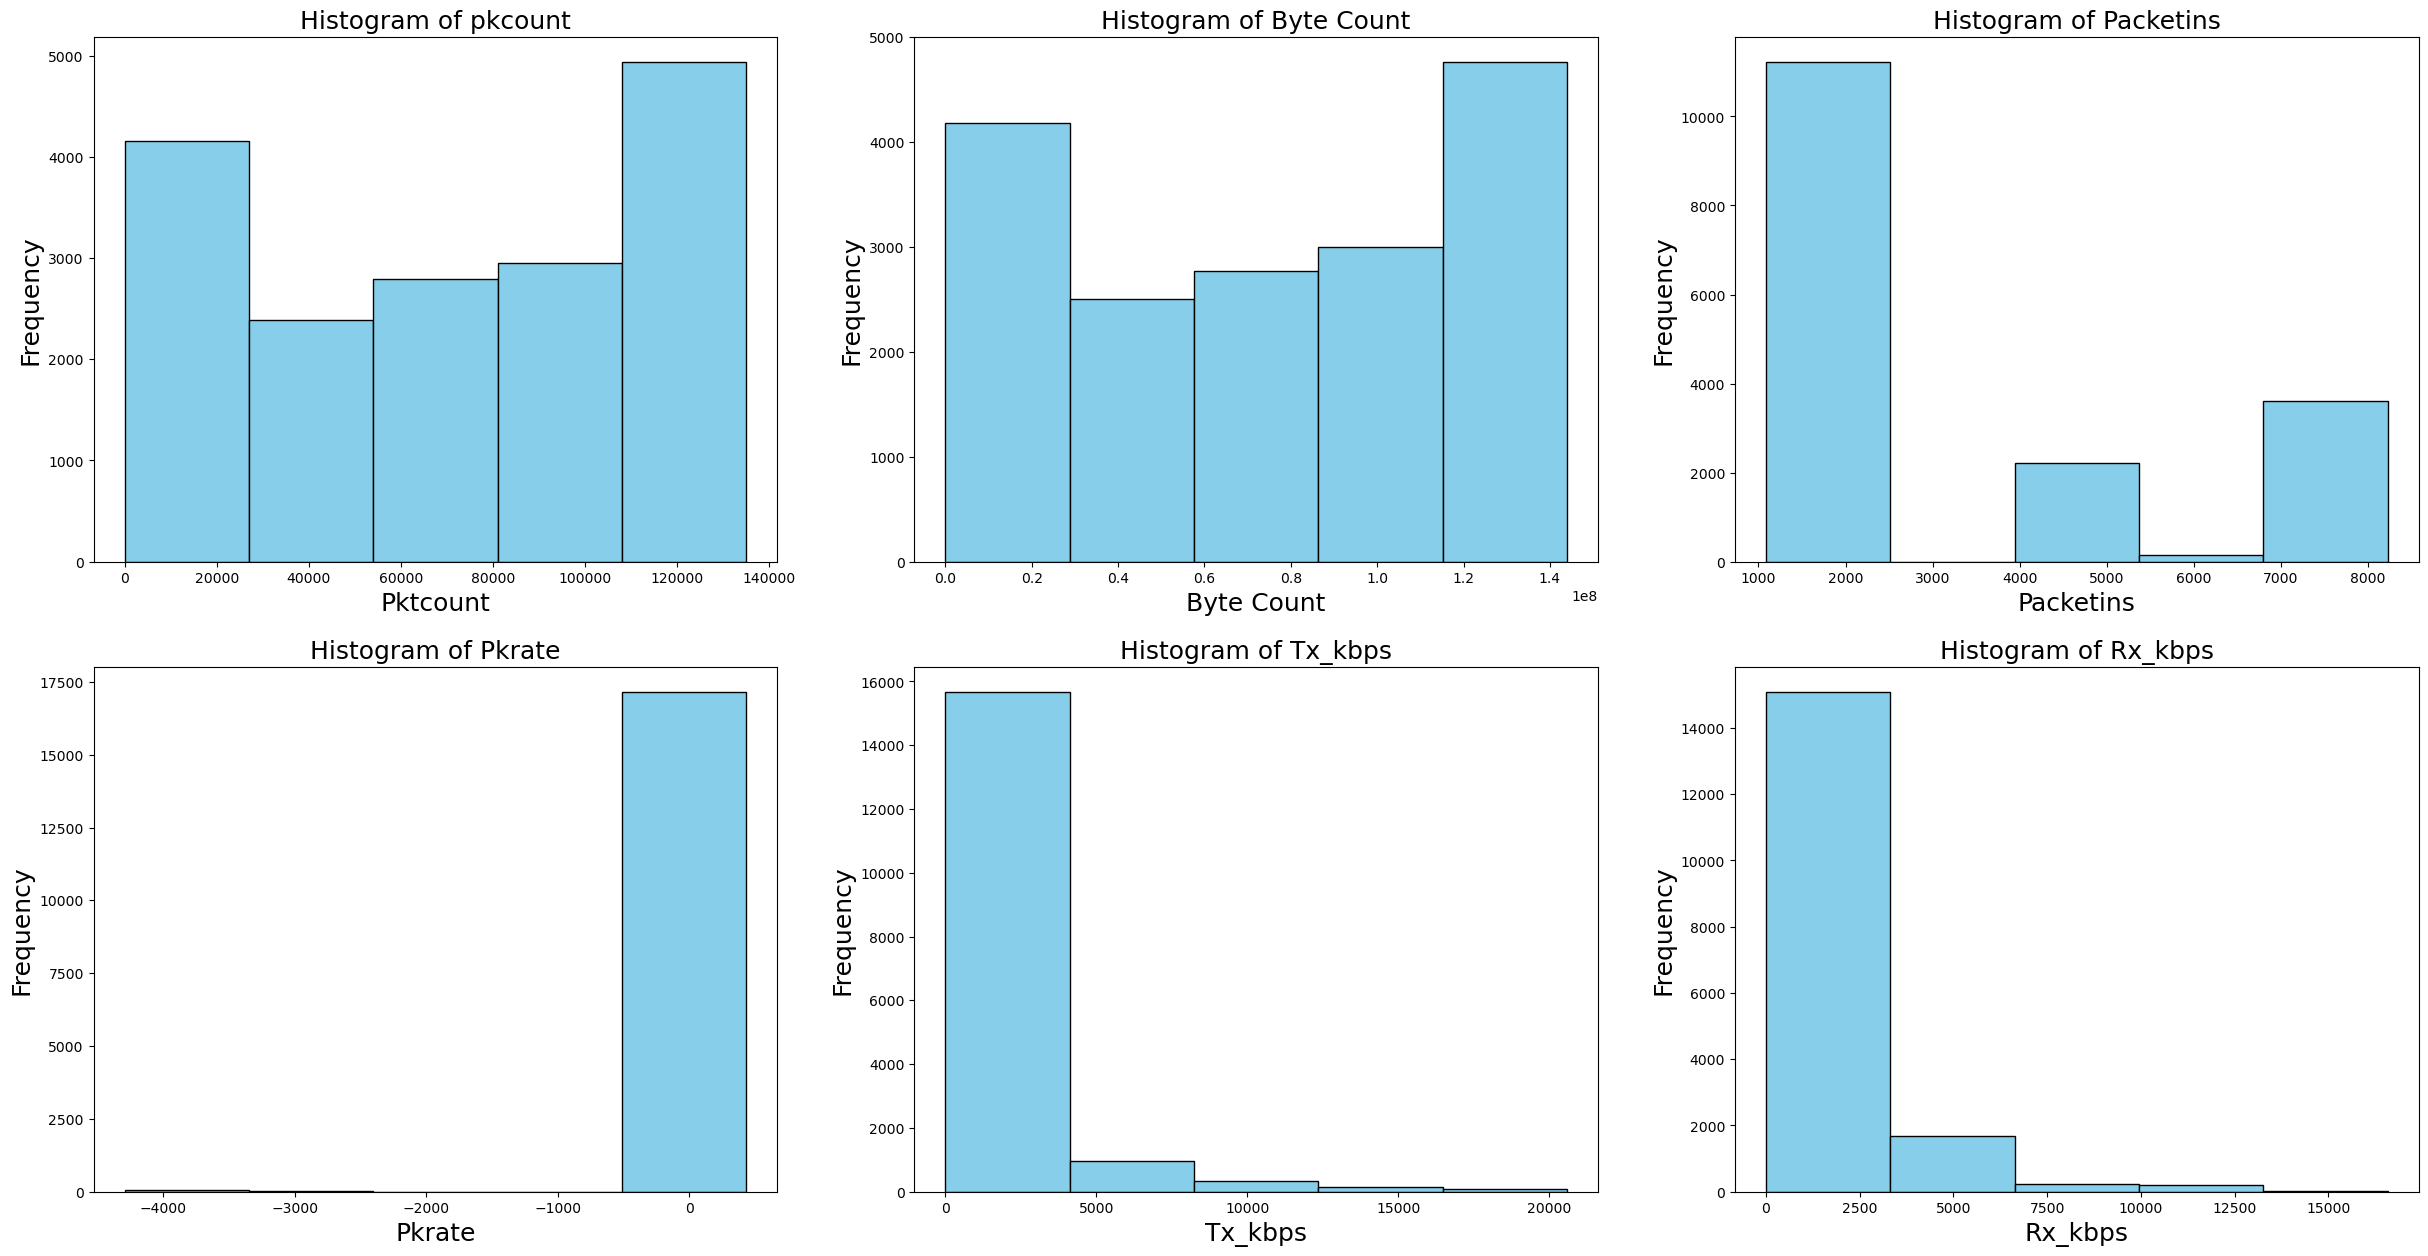

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

data_normal = {
    'pktcount': udpa['pktcount'],
    'bytecount': udpa['bytecount'],
    'packetins': udpa['packetins'],
    'pkrate':udpa['pktrate'],
    'tx_kbps':udpa['tx_kbps'],
    'rx_kbps':udpa['rx_kbps'],
}

fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


ax1.hist(data_normal['pktcount'], bins=5, color='skyblue', edgecolor='black')
ax1.set_xlabel('Pktcount',fontsize=18)  
ax1.set_ylabel('Frequency',fontsize=18) 
ax1.set_title('Histogram of pkcount',fontsize=18)


ax2.hist(data_normal['bytecount'], bins=5, color='skyblue', edgecolor='black')
ax2.set_xlabel('Byte Count',fontsize=18)
ax2.set_ylabel('Frequency',fontsize=18)
ax2.set_title('Histogram of Byte Count',fontsize=18)



ax3.hist(data_normal['packetins'], bins=5, color='skyblue', edgecolor='black')
ax3.set_xlabel('Packetins',fontsize=18)
ax3.set_ylabel('Frequency',fontsize=18)
ax3.set_title('Histogram of Packetins',fontsize=18)

ax4.hist(data_normal['pkrate'], bins=5, color='skyblue', edgecolor='black')
ax4.set_xlabel('Pkrate',fontsize=18)
ax4.set_ylabel('Frequency',fontsize=18)
ax4.set_title('Histogram of Pkrate',fontsize=18)

ax5.hist(data_normal['tx_kbps'], bins=5, color='skyblue', edgecolor='black')
ax5.set_xlabel('Tx_kbps',fontsize=18)
ax5.set_ylabel('Frequency',fontsize=18)
ax5.set_title('Histogram of Tx_kbps',fontsize=18)

ax6.hist(data_normal['rx_kbps'], bins=5, color='skyblue', edgecolor='black')
ax6.set_xlabel('Rx_kbps',fontsize=18)
ax6.set_ylabel('Frequency',fontsize=18)
ax6.set_title('Histogram of Rx_kbps',fontsize=18)

plt.savefig('./picture/abnormal_info_udp.png')

In [251]:
#Organised data is saved for subsequent machine learning and deep learning.
df.to_csv('ml.csv',index=None)